In [1]:
# Dependencies and Setup
import requests
import json
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
# added these dependencies
import json
import scipy.stats as st
from pprint import pprint
#this was already here
from scipy.stats import linregress

#Covid border shutdown : february 28-march 26, 2020
start_date = "2020-02-28"
end_date = "2020-03-26"

# URL for GET requests to retrieve vehicle data
url = "https://api.coindesk.com/v1/bpi/historical/close.json?start=2020-01-01&end=2020-12-31"
default = "start=2020-01-01&end=2020-12-31" 

# import the DOW csv file
file_to_load = "data/dow.csv"
dow_prices = pd.read_csv(file_to_load)
dow_prices_df = pd.DataFrame(dow_prices)

# import the GOLD csv file
file_to_load = "data/gold.csv"
gold_prices = pd.read_csv(file_to_load)
gold_prices_df = pd.DataFrame(gold_prices)
gold_prices_df.columns = gold_prices_df.columns.tolist()[:1] + ['Close'] + gold_prices_df.columns.tolist()[2:]


In [2]:
query_url = f'{url}start={start_date}&end={end_date}'

pprint(requests.get(query_url).json())

{'bpi': {'2020-01-01': 7188.4633,
         '2020-01-02': 6961.5683,
         '2020-01-03': 7346.58,
         '2020-01-04': 7355.855,
         '2020-01-05': 7356.3117,
         '2020-01-06': 7761.825,
         '2020-01-07': 8157.7617,
         '2020-01-08': 8042.8733,
         '2020-01-09': 7816.9233,
         '2020-01-10': 8189.265,
         '2020-01-11': 8016.4267,
         '2020-01-12': 8178.8833,
         '2020-01-13': 8105.4783,
         '2020-01-14': 8807.4267,
         '2020-01-15': 8808.4867,
         '2020-01-16': 8716.9133,
         '2020-01-17': 8890.25,
         '2020-01-18': 8901.17,
         '2020-01-19': 8698.5717,
         '2020-01-20': 8631.2883,
         '2020-01-21': 8727.6033,
         '2020-01-22': 8661.01,
         '2020-01-23': 8392.145,
         '2020-01-24': 8436.49,
         '2020-01-25': 8337.1017,
         '2020-01-26': 8602.7417,
         '2020-01-27': 8901.5067,
         '2020-01-28': 9393.2733,
         '2020-01-29': 9290.46,
         '2020-01-30': 9508.72

In [52]:
# bitcoin make the data frame for covid dates
response = requests.get(query_url).json()
my_dict = response['bpi']
bitcoin_df = pd.DataFrame(list(my_dict.items()),columns = ['close date','close price'])
bitcoin_df['close date'] = pd.to_datetime(bitcoin_df['close date'])
bitcoin_df = bitcoin_df.rename(columns={'close price':'bitcoin close'})
bitcoin_df

,close date,bitcoin close
0,2020-01-01,7188.4633
1,2020-01-02,6961.5683
2,2020-01-03,7346.5800
3,2020-01-04,7355.8550
4,2020-01-05,7356.3117
...,...,...
81,2020-03-22,5803.6700
82,2020-03-23,6492.9400
83,2020-03-24,6766.7817
84,2020-03-25,6687.7050


In [53]:
# djia make the data frame for covid dates
dow_prices_df['Date'] = pd.to_datetime(dow_prices_df['Date'])

dow_cleaned = dow_prices_df.loc[(dow_prices_df['Date'] >= start_date) & (dow_prices_df['Date'] <= end_date)]
dow_cleaned = dow_cleaned[["Date", "Close"]]

# rename date column to prep for merge
dow_df = dow_cleaned.rename(columns={'Date':'close date','Close':'dow close'})

dow_df

,close date,dow close
40,2020-02-28,25409.359375
41,2020-03-02,26703.320313
42,2020-03-03,25917.410156
43,2020-03-04,27090.859375
44,2020-03-05,26121.279297
45,2020-03-06,25864.779297
46,2020-03-09,23851.019531
47,2020-03-10,25018.160156
48,2020-03-11,23553.220703
49,2020-03-12,21200.619141


In [54]:
# gold make the data frame for gold dates
gold_prices_df['Date'] = pd.to_datetime(gold_prices_df['Date'])

gold_cleaned = gold_prices_df.loc[(gold_prices_df['Date'] >= start_date) & (gold_prices_df['Date'] <= end_date)]
gold_cleaned = gold_cleaned.sort_values(by=['Date']).reset_index(drop=True)
gold_cleaned = gold_cleaned.iloc[:,0:2]

# rename date column to prep for merge
gold_df = gold_cleaned.rename(columns={'Date':'close date', 'Close':'gold close'})

gold_df

,close date,gold close
0,2020-02-28,1564.1
1,2020-03-02,1592.3
2,2020-03-03,1642.1
3,2020-03-04,1643.0
4,2020-03-05,1666.4
5,2020-03-06,1672.4
6,2020-03-09,1675.7
7,2020-03-10,1659.1
8,2020-03-11,1642.3
9,2020-03-12,1590.3


In [66]:
# merging all three data sources into one
covid_merged = pd.merge(bitcoin_df, dow_df, on='close date', how='left')
covid_merged['close date'] = pd.to_datetime(covid_merged['close date'])
                           
covid_merged = pd.merge(covid_merged, gold_df, on='close date', how='left')
covid_merged = merged.dropna()
covid_merged

,close date,bitcoin close,dow close,gold close
58,2020-02-28,8715.6617,25409.359375,1564.1
61,2020-03-02,8926.2517,26703.320313,1592.3
62,2020-03-03,8768.1800,25917.410156,1642.1
63,2020-03-04,8767.8867,27090.859375,1643.0
64,2020-03-05,9073.2750,26121.279297,1666.4
65,2020-03-06,9165.1517,25864.779297,1672.4
68,2020-03-09,7944.4500,23851.019531,1675.7
69,2020-03-10,7899.2267,25018.160156,1659.1
70,2020-03-11,7951.1700,23553.220703,1642.3
71,2020-03-12,4914.0850,21200.619141,1590.3


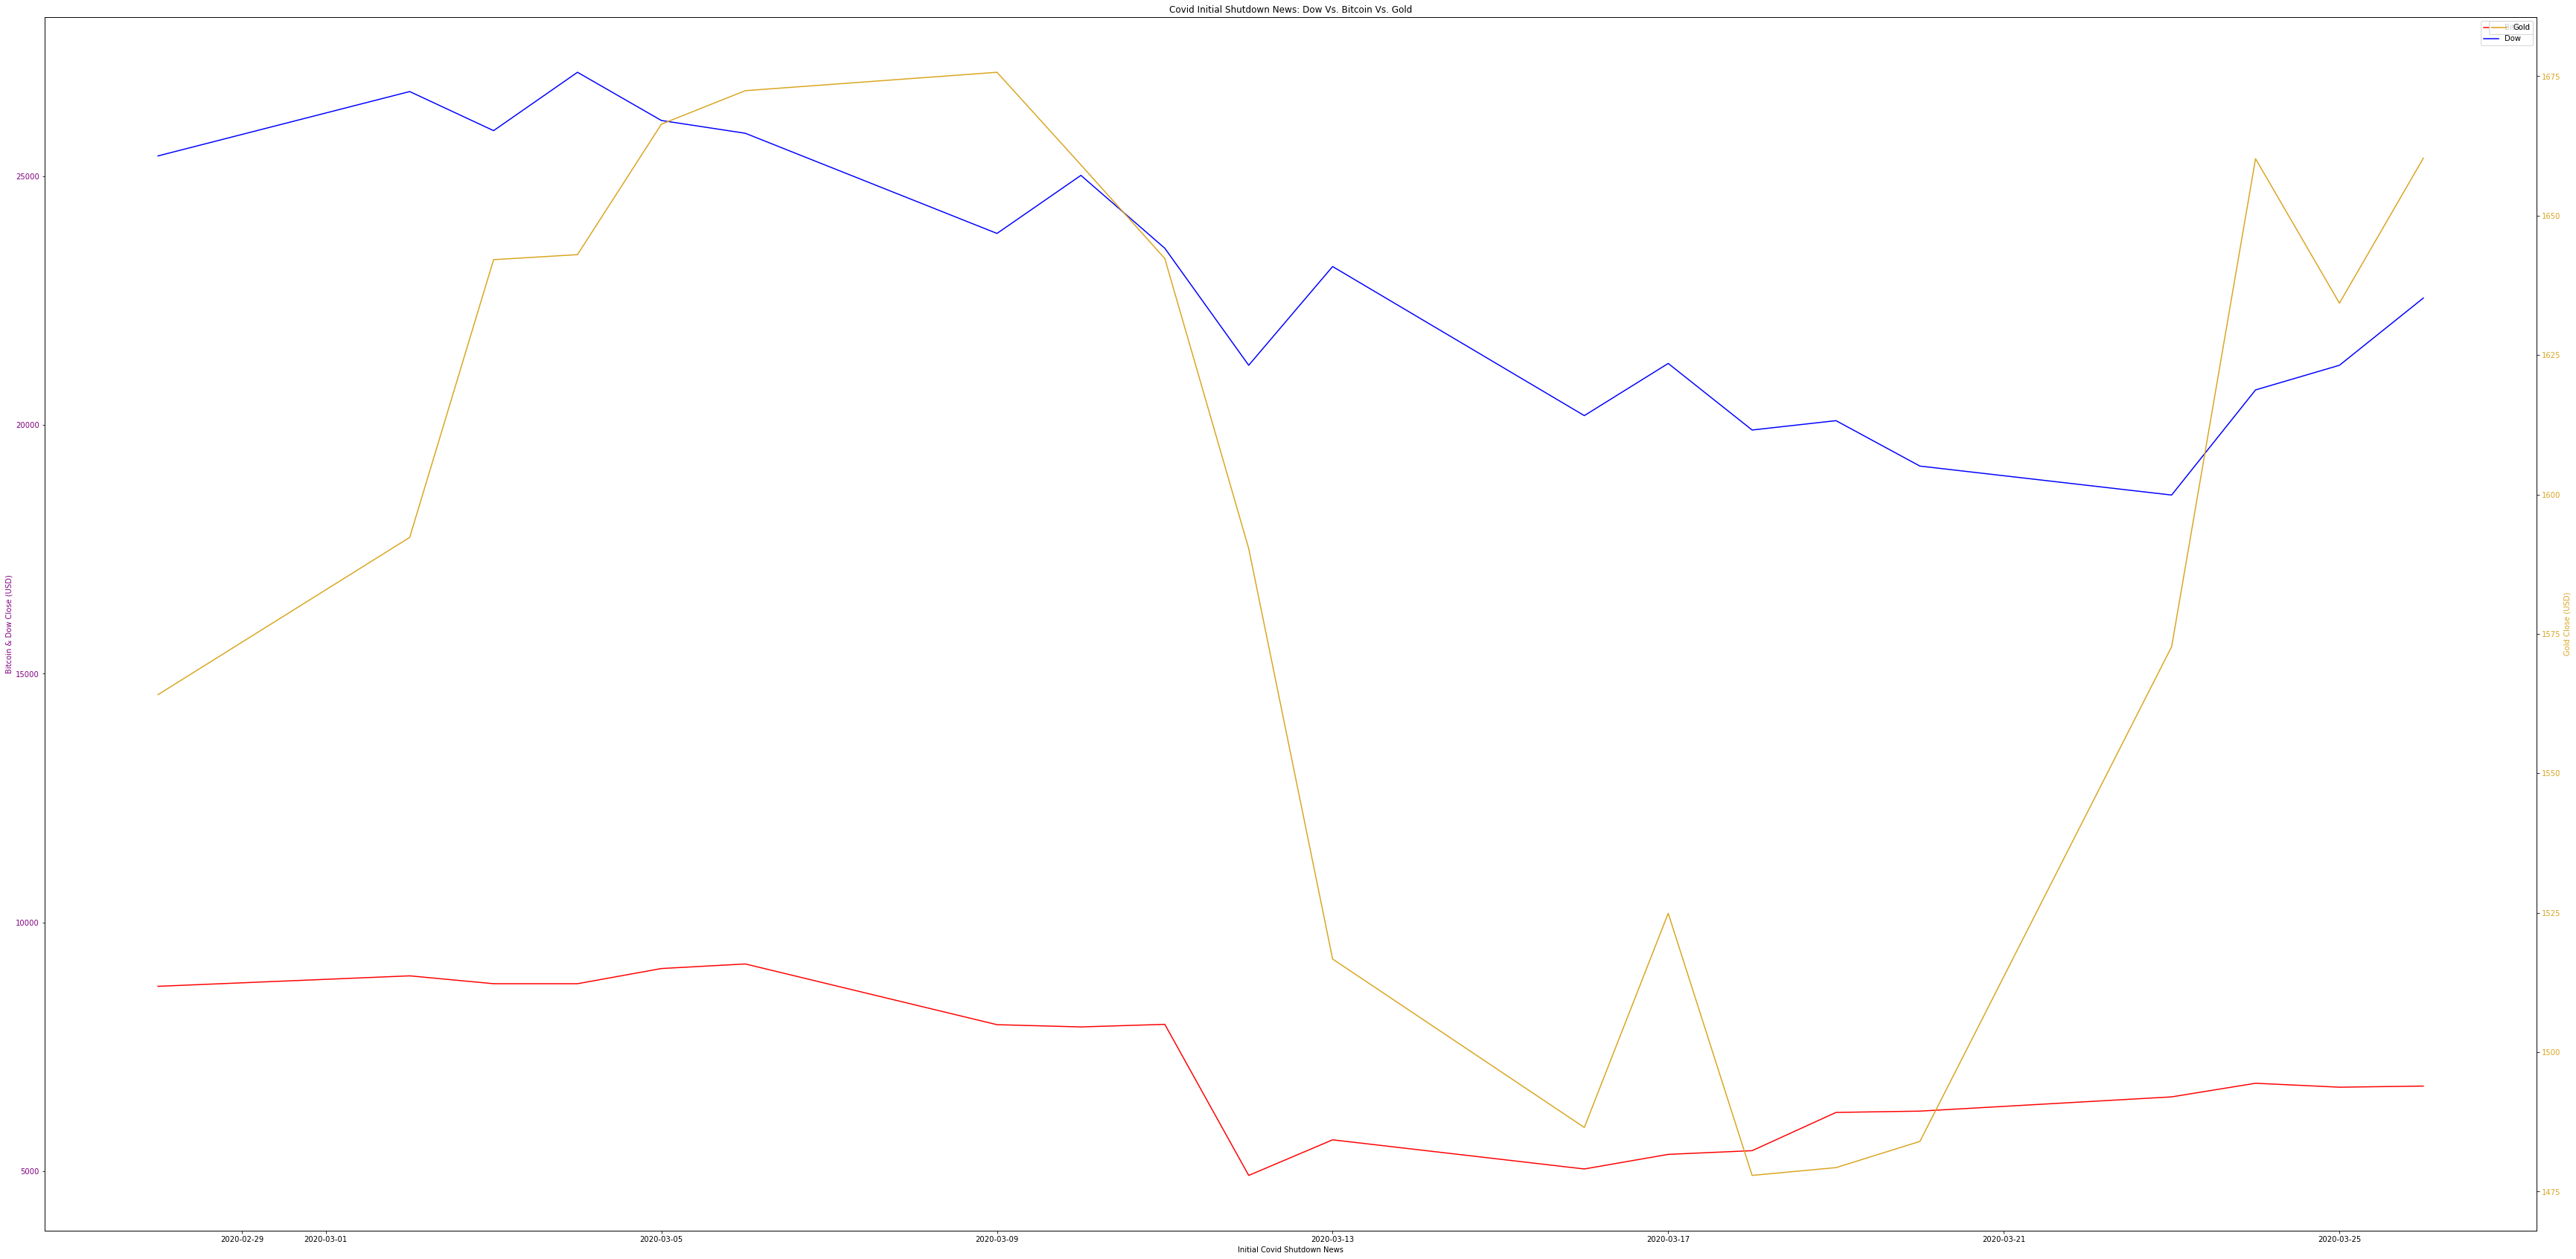

In [67]:
#Better Chart with 2 axis
fig, ax1 = plt.subplots()
color_bit ='red'
color_dow = 'blue'
color_gold = 'goldenrod'
color_label = 'purple'
ax1.set_xlabel('Initial Covid Shutdown News')
ax1.set_ylabel('Bitcoin & Dow Close (USD)', color =color_label)
ax1.plot(covid_merged['close date'], covid_merged['bitcoin close'], color=color_bit, Label='Bitcoin')
ax1.plot(covid_merged['close date'],covid_merged['dow close'],color=color_dow, Label='Dow')
ax1.tick_params(axis='y', labelcolor=color_label)
ax2=ax1.twinx()
ax2.set_ylabel('Gold Close (USD)', color =color_gold)
ax2.plot(covid_merged['close date'],covid_merged['gold close'],color=color_gold, Label='Gold')
ax2.tick_params(axis='y', labelcolor=color_gold)
#Title Clean up
plt.title("Covid Initial Shutdown News: Dow Vs. Bitcoin Vs. Gold")
plt.rcParams["figure.figsize"] = (60,30)
plt.rcParams.update({'font.size': 10})
#Legend Clean up
ax1.legend(loc=0)
ax2.legend(loc=0)
plt.show()

In [68]:
covid_merged.describe()

,bitcoin close,dow close,gold close
count,20.000000,20.000000,20.000000
mean,7129.578345,22877.559863,1592.225000
std,1474.355594,2740.331625,73.303212
min,4914.085000,18591.929688,1477.900000
25%,6042.596675,20575.812500,1522.850000
50%,6738.365850,22868.894532,1613.300000
75%,8728.717950,25523.214356,1659.375000
max,9165.151700,27090.859375,1675.700000
